It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



["What's your entitled Karen story?", 'Your Call of Duty lobby sessions were recorded and leaked to the public. How does this affect your reputation?', 'If your friend bails 3 times in a row last minute… what do you do?', 'Whats the most badass thing you’ve ever done?', 'Who’s the worst human to ever live?', 'What is your phobia?', "What's the one crazy thing you have seen someone do for gaining popularity?", 'What was the amount of pounds you lost when others noticed it vs when you noticed it yourself?', 'What are the best ways to let a large amount of employees go to be leaner and more efficient?', "What's the best advice you can give to someone starting their first job?"]
Node: best, Degree: 14
Node: amount, Degree: 13
Node: someone, Degree: 12


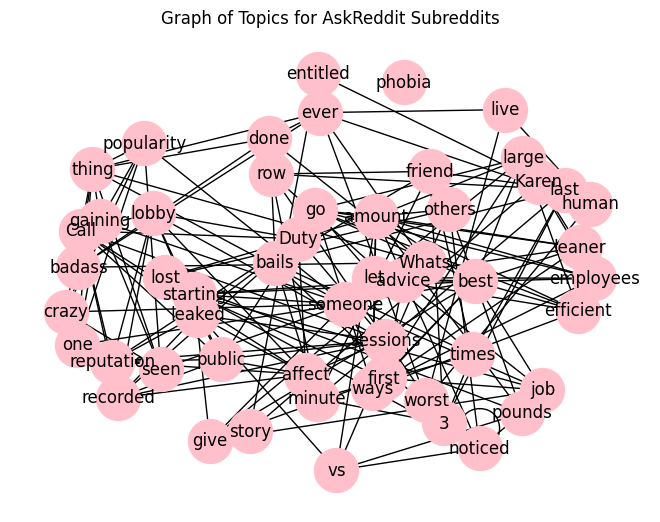

In [29]:
import json
import praw
import re
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer



redditApi = praw.Reddit(client_id='l0V6mrPkbJpYmryjdTAAgw',
                        client_secret='WWhMZWIxsaAHF1a6ONd0yR3lvnvE5A',
                        user_agent='Timely_Soup_2022')

#Using the AskReddit subreddit
subreddit = "AskReddit"
targetSub = redditApi.subreddit(subreddit)

#creating an array to store the titles of subreddits
title_list = []
submissions = targetSub.new(limit=10)
for post in submissions:
        title_list.append(post.title)

print(title_list)




# Tokenizing titles and removing stopwords
tokenizer = TweetTokenizer()
stop_words = set(stopwords.words('english'))

tokenized_titles = []
for title in title_list:
    tokens = tokenizer.tokenize(title)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and re.match(r'^\w+$', token)]
    tokenized_titles.append(filtered_tokens)


g = nx.Graph()

# Adding a node for each unique title
for tokens in tokenized_titles:
    for token in tokens:
        if not g.has_node(token):
            g.add_node(token)

# Create edges
for tokens in tokenized_titles:
    for i in range(len(tokens)):
        for j in range(i + 1, len(tokens)):
            g.add_edge(tokens[i], tokens[j])

# Getting the degree of each node
node_degrees = dict(g.degree())

# Finding the top 3 nodes with most edges
top_nodes = sorted(node_degrees, key=node_degrees.get, reverse = True)[ :3]

# Printing the top 3 nodes and respective degrees
for node in top_nodes:
    print(f"Node: {node}, Degree: {node_degrees[node]}")

# Plotting the graph
pos = nx.spring_layout(g, seed=42, k = 1.5)

nx.draw(g, pos, with_labels=True, node_size=1000, node_color="pink", font_size=12)
plt.title(f"Graph of Topics for AskReddit Subreddits")
plt.show()



In [10]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.1 MB/s eta 0:00:00
